# Excercise 5
## NLP with Keras

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

## 5.1 Predict rating of a movie using Keras

**Exercise:** Use keras framework to predict rating.

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [4]:
plots

,plot
3107,most is the story of a single father who takes...
900,a serial killer decides to teach the secrets o...
6724,"in sweden , a female blackmailer with a disfi..."
4704,"in a friday afternoon in new york , the presi..."
2582,"in los angeles , the editor of a publishing h..."
...,...
8417,""" our marriage , their wedding . "" it ' s l..."
1592,"the wandering barbarian , conan , alongside ..."
1723,"like a tale spun by scheherazade , kismet fol..."
7605,"mrs . brisby , a widowed mouse , lives in a..."


In [5]:
y

,rating
3107,1
900,0
6724,1
4704,1
2582,1
...,...
8417,0
1592,0
1723,0
7605,1


## Data Precosessing

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [6]:
!pip install tensorflow


In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
nltk.download('stopwords')
nltk.download('punkt')


from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import random
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    # 2 Convertir todo el texto a minúsculas
    text = text.lower()

    # Eliminar puntuación del texto
    text = ''.join([char for char in text if char not in string.punctuation])

    # 3 Tokenizar el texto
    tokens = word_tokenize(text)

    # 1 Eliminar las stopwords del texto tokenizado
    tokens = [word for word in tokens if word not in stop_words]

    # Unir las palabras restantes en una sola cadena de texto
    return ' '.join(tokens)

X = plots.apply(preprocess)
X = X.tolist()
# Crear vocabulario a partir de las palabras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Convertir el texto en secuencias de enteros
X_seq = tokenizer.texts_to_sequences(X)
max_len = 150

# 4 pad_sequences
X_pad = pad_sequences(X_seq, maxlen=max_len)

## Build Model

Create a neural network to predict the rating of a movie, calculate the testing set accuracy.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5236 - loss: 0.8694
Epoch 1: val_loss improved from inf to 0.84812, saving model to best_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.5238 - loss: 0.8693 - val_accuracy: 0.5285 - val_loss: 0.8481
Epoch 2/50
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5247 - loss: 0.8437
Epoch 2: val_loss improved from 0.84812 to 0.82356, saving model to best_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5273 - loss: 0.8423 - val_accuracy: 0.5285 - val_loss: 0.8236
Epoch 3/50
33/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5402 - loss: 0.8202
Epoch 3: val_loss improved from 0.82356 to 0.80238, saving model to best_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5406 - loss: 0.8187 - val_accuracy: 0.5344 - val_loss: 0.8024
Epoch 4/50
29/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5410 - loss: 0.7998
Epoch 4: val_loss improved from 0.80238 to 0.78404, saving mod

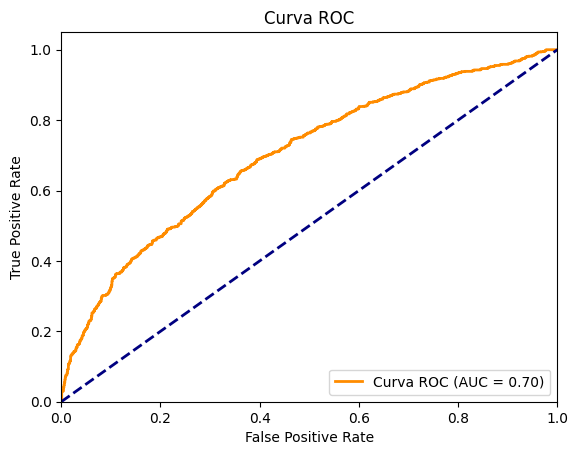

In [9]:


seed_value = 18
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, random_state=18, stratify=y)
# Construcción del modelo de red neuronal
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))
model.add(GlobalAveragePooling1D())

model.add(Dense(320, activation='relu', kernel_regularizer=l2(0.0005)))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0005)))
#model.add(BatchNormalization())
model.add(Dropout(0.7))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.00017214681797713476)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
best_model = ModelCheckpoint('best_model.keras', verbose=1, save_best_only=True)


history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=128,
                    verbose=1,
                    callbacks=[early_stop, best_model])


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"------------------ACCURACY------------------: {test_acc * 100:.2f}%")


y_pred_prob = model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [10]:
#pip install keras-tuner